## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = combined_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
new_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined_df[['Mouse ID','Timepoint']].duplicated(keep='first')
combined_df[duplicate]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Checking the number of mice in the clean DataFrame.
number_mice = new_combined_df["Mouse ID"].nunique()
number_mice

249

## Summary Statistics

In [6]:
# Groupby Drug Regimen
regimen_df = new_combined_df.groupby("Drug Regimen")

In [7]:
# Generate a summary statistics table of mean, median, variance,  standard deviation, and SEM 
# of the tumor volume for each regimen
mean = regimen_df["Tumor Volume (mm3)"].mean()
median = regimen_df["Tumor Volume (mm3)"].median()
variance = regimen_df["Tumor Volume (mm3)"].var()
std = regimen_df["Tumor Volume (mm3)"].std()
sem = regimen_df["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean":mean, "Median":median,
                           "Variance":variance,"Standard Deviation":std,
                           "Standard Error" : sem
                          })
summary_df = summary_df.sort_values("Mean")
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

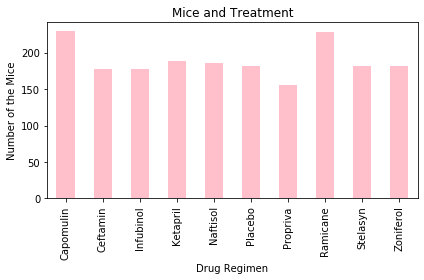

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pandas. 
regimen_df["Mouse ID"].count().plot(kind ="bar", facecolor = "pink", align="center")
plt.title("Mice and Treatment")
plt.ylabel("Number of the Mice")
plt.tight_layout()

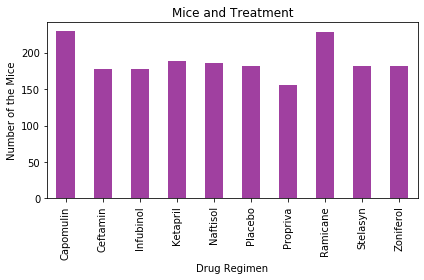

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout
# the course of the study using pyplot.
regimen_df["Mouse ID"].count().plot.bar(facecolor = "purple", alpha=0.75, align="center")
plt.title("Mice and Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of the Mice")

plt.tight_layout()
plt.show()

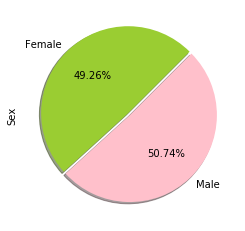

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = new_combined_df.groupby("Sex")
total_mice = sex_df["Sex"].count()
colors = ["yellowgreen", "pink"]
explode = [0.03, 0]
total_mice.plot(kind= "pie",explode = explode, colors = colors, autopct="%1.2f%%",
                    shadow = True, startangle = 45)
plt.show()

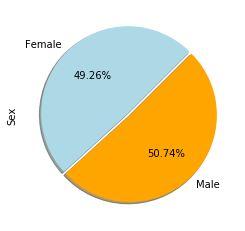

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue", "orange"]
explode = [0.03, 0]
total_mice.plot.pie(explode = explode, colors = colors, autopct="%1.2f%%",
                    shadow = True, startangle = 45)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [13]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint = new_combined_df.groupby(['Mouse ID'])['Timepoint'].transform(max) == new_combined_df['Timepoint']
new_df = new_combined_df[greatest_timepoint]
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

In [15]:
# Capomulin
capomulin_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin", :]
quartiles_capomulin = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_capomulin = round(quartiles_capomulin[0.25],2)
upperq_capomulin = round(quartiles_capomulin[0.75],2)
iqr_capomulin = round(upperq_capomulin-lowerq_capomulin,2)

lower_bound_capomulin = round(lowerq_capomulin - (1.5*iqr_capomulin),2)
upper_bound_capomulin = round(upperq_capomulin + (1.5*iqr_capomulin),2)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [16]:
# Ramicane
ramicane_df = new_df.loc[new_df["Drug Regimen"] == "Ramicane", :]
quartiles_ramicane = ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ramicane = round(quartiles_ramicane[0.25],2)
upperq_ramicane = round(quartiles_ramicane[0.75],2)
iqr_ramicane = round(upperq_ramicane-lowerq_ramicane,2)

lower_bound_ramicane = round(lowerq_ramicane - (1.5*iqr_ramicane),2)
upper_bound_ramicane = round(upperq_ramicane + (1.5*iqr_ramicane),2)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")

Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [17]:
# Infubinol
infubinol_df = new_df.loc[new_df["Drug Regimen"] == "Infubinol", :]
quartiles_infubinol = infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_infubinol = round(quartiles_infubinol[0.25],2)
upperq_infubinol = round(quartiles_infubinol[0.75],2)
iqr_infubinol = round(upperq_infubinol-lowerq_infubinol,2)

lower_bound_infubinol = round(lowerq_infubinol - (1.5*iqr_infubinol),2)
upper_bound_infubinol = round(upperq_infubinol + (1.5*iqr_infubinol),2)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


In [18]:
# Ceftamin
ceftamin_df = new_df.loc[new_df["Drug Regimen"] == "Ceftamin", :]
quartiles_ceftamin = ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ceftamin = round(quartiles_ceftamin[0.25],2)
upperq_ceftamin = round(quartiles_ceftamin[0.75],2)
iqr_ceftamin = round(upperq_ceftamin-lowerq_ceftamin,2)

lower_bound_ceftamin = round(lowerq_ceftamin - (1.5*iqr_ceftamin),2)
upper_bound_ceftamin = round(upperq_ceftamin + (1.5*iqr_ceftamin),2)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


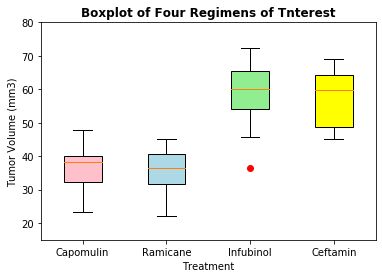

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest.
data = [capomulin_df["Tumor Volume (mm3)"], ramicane_df["Tumor Volume (mm3)"],
        infubinol_df["Tumor Volume (mm3)"], ceftamin_df["Tumor Volume (mm3)"]]
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig, ax = plt.subplots()
plot = ax.boxplot(data, patch_artist=True,labels=labels,sym='red')
plt.title("Boxplot of Four Regimens of Tnterest",fontsize=12, weight="bold")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
ax.set_ylim(15,80)

colors = ['pink', 'lightblue', 'lightgreen',"yellow"] 
for patch, color in zip(plot["boxes"], colors):
    patch.set_facecolor(color)

## Line and Scatter Plots

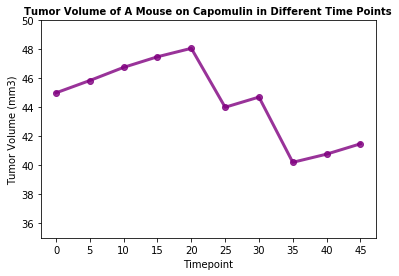

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_2_df = new_combined_df.loc[new_combined_df["Drug Regimen"] == "Capomulin", :]
capomulin_l509_df = capomulin_2_df.loc[capomulin_2_df["Mouse ID"] == "l509", :]
timepoint = capomulin_l509_df["Timepoint"].sort_values()
tumor_volume = capomulin_l509_df["Tumor Volume (mm3)"]

# Plot
plt.plot(timepoint, tumor_volume, marker='o', color = "purple",linewidth=3, alpha =0.8)
plt.title("Tumor Volume of A Mouse on Capomulin in Different Time Points", fontsize=10, weight="bold")
plt.xticks(timepoint)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(35,50)
plt.show()

Text(0, 0.5, 'Avreaged Tumor Volume (mm3)')

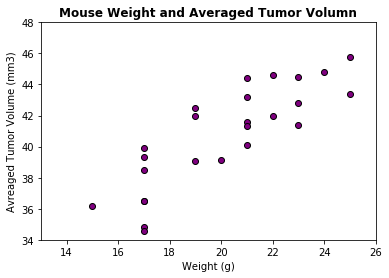

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
new_df = new_combined_df.groupby(["Mouse ID","Weight (g)","Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()
capomulin_3_df= new_df.loc[new_df["Drug Regimen"] == "Capomulin", :]
x_value = capomulin_3_df["Weight (g)"]
y_value = capomulin_3_df["Tumor Volume (mm3)"]

plt.scatter(x_value, y_value, marker="o", facecolors="purple", edgecolors="black")
plt.xlim(13,26)
plt.ylim(34,48)
plt.title("Mouse Weight and Averaged Tumor Volumn",fontsize=12, weight="bold")
plt.xlabel("Weight (g)")
plt.ylabel("Avreaged Tumor Volume (mm3)")

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [23]:
# Correlation coefficient
data_df = pd.DataFrame({"Weight" : x_value,
        "Averaged Tumor Volume" : y_value})
corrrelation = data_df.corr(method="pearson")
print (corrrelation)

                         Weight  Averaged Tumor Volume
Weight                 1.000000               0.841936
Averaged Tumor Volume  0.841936               1.000000


The r-squared is: 0.7088568047708717.


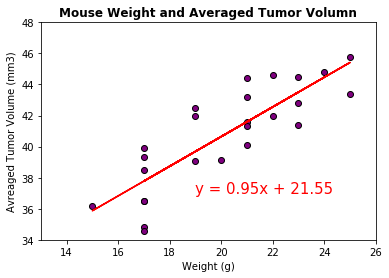

In [24]:
# Linear regression model
# Get weight as x value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot again
plt.scatter(x_value,y_value, marker="o", facecolors="purple", edgecolors="black")
plt.xlim(13,26)
plt.ylim(34,48)
plt.title("Mouse Weight and Averaged Tumor Volumn",fontsize=12, weight="bold")
plt.xlabel("Weight (g)")
plt.ylabel("Avreaged Tumor Volume (mm3)")

# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,37),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")